<a href="https://colab.research.google.com/github/ms624atyale/Python_Basics/blob/main/24_NLP_DigitalHumanities_ModifiedfromJunkyuhufs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌿 특강 2: 자연어처리와 디지털인문학 따라하기
##1. 자연언어처리(NLP) 
##2. 국정연설 토픽모델링(Topic-Modeling) 
##3. 문학작품 감성분석(Sentiment Analysis)
##4. 영화리뷰 군집분석(Clustering Analysis)

### 발표: 이준규 (한국외국어대학교 교육대학원 영어교육전공)

# 개요

In [1]:
#@markdown Introduction 
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.01.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.02.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.03.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.04.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.05.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.06.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 7)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

#Python 시작하기
##텍스트 전처리 예시 (Preprocessing examples)

In [2]:
#@markdown Python library & 전처리
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = [ "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.07.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.08.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.11.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

In [3]:
#@markdown Import/Install relevant packages
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
#@markdown "The rain in Spain falls mainly on the plain." 전처리
text = "The rain in Spain falls mainly on the plain."
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
    
df

The the DET True
rain rain NOUN False
in in ADP True
Spain Spain PROPN False
falls fall VERB False
mainly mainly ADV False
on on ADP True
the the DET True
plain plain NOUN False
. . PUNCT False


,text,lemma,POS,explain,stopword
0,The,the,DET,determiner,True
1,rain,rain,NOUN,noun,False
2,in,in,ADP,adposition,True
3,Spain,Spain,PROPN,proper noun,False
4,falls,fall,VERB,verb,False
5,mainly,mainly,ADV,adverb,False
6,on,on,ADP,adposition,True
7,the,the,DET,determiner,True
8,plain,plain,NOUN,noun,False
9,.,.,PUNCT,punctuation,False


In [5]:
#@markdown Sentence 시각화
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

# [1] Topic modeling w/ 미국 대통령 연설문

In [6]:
#@markdown 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = [ "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.09.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.10.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 3)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

### 필요한 파일 불러오기 

* 데이터: **state-of-the-union.csv:** 1970에서 2012까지 미국 대통령 국정연설

[💾 Topic modeling 실습파일 다운받기](https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv)

In [7]:
#@markdown 국정연설 파일 불러오기
import os
import requests

# Make data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the CSV file
url = "https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv"
response = requests.get(url)

# Save the content to a file
with open("data/state-of-the-union.csv", "wb") as f:
    f.write(response.content)


In [8]:
#@markdown 불러온 csv를 data frame 형태로 변환 및 청소
import pandas as pd
df = pd.read_csv("data/state-of-the-union.csv")
# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")
df.head()

<ipython-input-8-5cfa88ce1ce8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


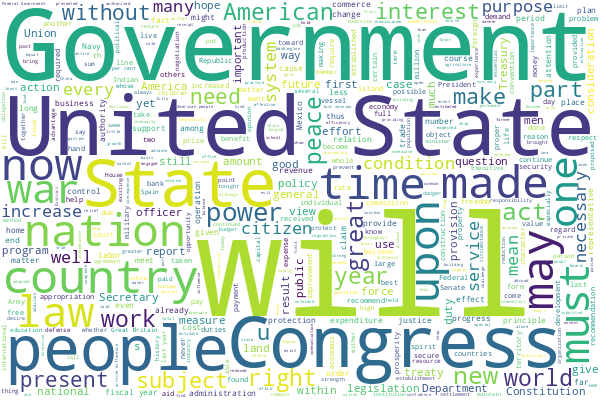

In [9]:
#@markdown 워드클라우드 시각화
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.content.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=36, contour_color='steelblue', width = 600, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## LDA (잠재 디리클레 할당)을 위한 자료 준비

+ gensim.utils.simple_preprocess를 이용하여, document를 a list of tokens으로 변환. 
+ 소문자로 바꾸기, 토큰화 등 (선택사항) 

In [10]:
#@markdown Gensim설치
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#@markdown gensim의 simple_preprocess 이용한 토큰화
import gensim
from gensim.utils import simple_preprocess
df.content = df.content.apply(simple_preprocess)

불용어(stopwords) 제거하기: 예) to, I, the, a, from, 등등

In [12]:
#@markdown stopwords 제거
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'to']) # add more if want
df.content = df.content.apply(lambda words: [word for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
#@markdown 토큰화 > 카운트벡터 (BOW형태로 변환) 형태인 corpus 생성; 처음 20개 결과 확인
texts = df.content #Gensim에서는 토큰화된 결과를 texts로 지정해야 함
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5) #출현한 문서 빈도수가 낮거나 (문서에서 5번 이하) or 높은 단어들 (0.5 -> 50%이상) 제외 
corpus = [dictionary.doc2bow(text) for text in texts] #doc2bow() >> 토큰화된 결과를 카운트 벡터, 즉 BOW형태로 변환; Gensim에서는 doc2bow()의 결과를 corpus로 지정해야 함
corpus[0][:20]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1)]

In [14]:
#@markdown 카운트 벡터형태의 corpus를 TF-IDF로 변환; 처음 20개 결과 확인
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0][-20:]

[(182, 0.11569544335266337),
 (183, 0.03345716487176589),
 (184, 0.08396611168035908),
 (185, 0.02788990694521304),
 (186, 0.061739983955738154),
 (187, 0.09888327011925634),
 (188, 0.0426229433218899),
 (189, 0.032269802228782236),
 (190, 0.048936377415776125),
 (191, 0.06453960445756447),
 (192, 0.0636122246503216),
 (193, 0.09392797157424708),
 (194, 0.10466802191811966),
 (195, 0.02493406458573687),
 (196, 0.02823446717801553),
 (197, 0.05223678000805479),
 (198, 0.061739983955738154),
 (199, 0.029289209153612196),
 (200, 0.11569544335266337),
 (201, 0.02621673039673532)]

In [15]:
#@markdown LDA(잠재 디리클레할당) 실행; 토픽수 = 15개 지정 (3개만 확인)
from gensim import models
n_topics = 15
lda_model = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=n_topics)

#15개 중 3개만 보여주기
lda_model.print_topics()[:3]

[(0,
  '0.001*"gentlemen" + 0.001*"interstate" + 0.001*"industrial" + 0.000*"program" + 0.000*"unrest" + 0.000*"vietnam" + 0.000*"slave" + 0.000*"programs" + 0.000*"coast" + 0.000*"method"'),
 (1,
  '0.001*"americans" + 0.001*"jobs" + 0.000*"coinage" + 0.000*"tonight" + 0.000*"cannot" + 0.000*"silver" + 0.000*"businesses" + 0.000*"help" + 0.000*"spending" + 0.000*"values"'),
 (2,
  '0.001*"mexico" + 0.001*"texas" + 0.001*"tonight" + 0.001*"budget" + 0.001*"minister" + 0.001*"program" + 0.001*"americans" + 0.001*"mexican" + 0.000*"recovery" + 0.000*"california"')]

In [16]:
#@markdown 시각화 라이브러리 설치
%%capture
!pip install pyLDAvis
!pip install "pandas<2.0.0" 

## LDA 시각화

In [17]:
#@markdown LDA결과 시각화
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.007198  0.007342       1        1  35.563278
7     -0.008471 -0.000416       2        1  29.801423
2     -0.003951  0.006171       3        1  14.702749
11     0.001467  0.004989       4        1  11.547746
13    -0.008912 -0.001864       5        1   4.731498
6      0.006948  0.005602       6        1   1.103101
9      0.010071  0.001136       7        1   0.840325
3      0.001098 -0.001599       8        1   0.754776
0      0.004113 -0.000221       9        1   0.503934
10    -0.002522 -0.002545      10        1   0.119706
8      0.000131 -0.009347      11        1   0.111233
1     -0.001385 -0.005566      12        1   0.105882
5      0.003425  0.000017      13        1   0.069128
12     0.001762 -0.001081      14        1   0.023331
14     0.003424 -0.002619      15        1   0.021891, topic_info=            Term        Freq       Total Category  logprob  loglift
9232     tonight  367.000000  367.000000  Default  30.0000  30.0000
9060      soviet  189.000000  189.000000  Default  29.0000  29.0000
8694     program  221.000000  221.000000  Default  28.0000  28.0000
8394      budget  251.000000  251.000000  Default  27.0000  27.0000
8999        jobs  236.000000  236.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
9105   communist    0.025085  104.342277  Topic15  -8.1670   0.0937
253   convention    0.026193  144.860047  Topic15  -8.1238  -0.1912
7376        help    0.027216  234.125406  Topic15  -8.0855  -0.6329
2671     million    0.025713  135.848444  Topic15  -8.1423  -0.1454
2053     islands    0.025008  115.194119  Topic15  -8.1701  -0.0083

[1007 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5513      1  0.383651  abounding
5513      2  0.268556  abounding
5513      3  0.115095  abounding
5513      4  0.115095  abounding
5513      5  0.076730  abounding
...     ...       ...        ...
4169      3  0.169459     yellow
4169      4  0.101675     yellow
4169      5  0.067784     yellow
4169      6  0.033892     yellow
4169      7  0.033892     yellow

[4106 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 3, 12, 14, 7, 10, 4, 1, 11, 9, 2, 6, 13, 15])

# [2] Sentiment Analysis (w/ Harry Potter)

In [18]:
#@markdown Intro to SA

from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.13.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.12.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.14.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 분석할 자료 준비

+ [소스링크: Harry Potter 자료를 공유한 깃허브 사이트](https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git)

+ [텍스트 예시](https://raw.githubusercontent.com/ErikaJacobs/Harry-Potter-Text-Mining/master/Book%20Text/HPBook1.txt)

In [19]:
#@markdown Harry Potter자료 가져오기
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (109/109), 13.39 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [20]:
#@markdown 데이터 전처리: Pandas이용 데이터 정리 (책의 한 챕터가 한 셀에 있는 상태)
import pandas as pd #Importing Pandas package
%cd /content/Harry-Potter-Text-Mining/Book Text

import glob 
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

df

/content/Harry-Potter-Text-Mining/Book Text
/content


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,Chapter,Book
0,"THE WORST BIRTHDAY Not for the first time, an...",1,2
1,DOBBY'S WARNING arry managed not to shout o...,2,2
2,"THE BURROW Ron.l\ breathed Harry, creeping to...",3,2
3,AT FL0VRR 11 $ HAND BLOTTS ife at the Burrow ...,4,2
4,THE WHOMPING WILLOW he end of the summer vac...,5,2
...,...,...,...
17,"MOONY, WORMTAIL, PADDFOOT, AND PRONGS It to...",18,3
18,THE SERVANT OF LORD VOLDEMORT Hermione scre...,19,3
19,THE DEMENTOR'S KISS Harry had never been pa...,20,3
20,HERMIONE'S SECRET Shocking business... shoc...,21,3


In [21]:
#@markdown 데이터 전처리 불용어(stopwords) 제거
import nltk #Import NLTK library
nltk.download('stopwords')
nltk.download('punkt') #installed punkt to fix error
from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#@markdown 데이터 전처리: 책 > 문장단위로 (챕터가 문장단위로 나뉜 상태)
# Creating a table breaking down the text by each sentence, rather than each chapter.
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Make smaller table - reset index to prepare for further work
dfsentiment = df[['Book','Chapter','Text']].reset_index() \
    .drop(["index"], axis=1)
dfsentiment = dfsentiment.join(dfsentiment.Text.apply(sent_tokenize).rename('Sentences')) # Breaking apart text into sentences

#Put every tokenized sentence into its own row
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["Text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values
dfsentiment2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Book,Chapter,Sentence
0,1,1,the boy who lived mr and mrs dursley of numbe...
1,1,1,they were the last people youd expect to be in...
2,1,1,mr dursley was the director of a firm called g...
3,1,1,he was a big beefy man with hardly any neck al...
4,1,1,mrs dursley was thin and blonde and had nearly...
...,...,...,...
70979,7,37,the train began to more and harry walked along...
70980,7,37,harry kept smiling and waving even though it w...
70981,7,37,the train rounded a corner
70982,7,37,harrys hand was still raised in farewellhell b...


##감정분석 실행

In [23]:
#@markdown 필요한 라이브러리(VADER library) 불러오기
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


###Harry Potter 예시문장 (stemmed 문장)


|출처 | 예시문장 | 감정 |
|--|--|--|
|[0,1,1]|'the boy who lived mr and mrs dursley of number four privet drive were **proud** to say that they were perfectly normal **thank** you very much'|😄 Positive|[0,1,1]|
|[1,1,1]|'they were the last people youd expect to be involved in anything **strange** or **mysterious** because they just didnt hold with such **nonsense**'|😡 Negative |
|[2,1,1]|'mr dursley was the director of a firm called grunnings which made drills'|😐 Neutral|


+ *Note*. 출처 == [sentence number, Book, Chapter]

In [24]:
#@markdown 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral 
# Get intensity scores of each sentence
dfsentiment2['Score']=dfsentiment2.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment2['CompScore']=dfsentiment2.Score.apply(lambda x: x.get("compound"))
dfsentiment2['PosScore']=dfsentiment2.Score.apply(lambda x: x.get("pos"))
dfsentiment2['NegScore']=dfsentiment2.Score.apply(lambda x: x.get("neg"))
dfsentiment2['NeuScore']=dfsentiment2.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment2 = dfsentiment2.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment2['PosFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment2['NegFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment2['NeuFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
dfsentiment2.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Book,Chapter,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,1,1,the boy who lived mr and mrs dursley of numbe...,0.8779,0.335,0.000,0.665,1,0,0
1,1,1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,1,1,mr dursley was the director of a firm called g...,0.0000,0.000,0.000,1.000,0,0,1
3,1,1,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,1,1,mrs dursley was thin and blonde and had nearly...,0.4927,0.084,0.000,0.916,1,0,0
5,1,1,the dursleys had a small son called dudley and...,-0.2960,0.000,0.121,0.879,0,1,0
6,1,1,the dursleys had everything they wanted but th...,0.3612,0.199,0.148,0.653,1,0,0
7,1,1,they didnt think they could bear it if anyone ...,0.0000,0.000,0.000,1.000,0,0,1
8,1,1,mrs potter was mrs dursleys sister but they ha...,0.0000,0.000,0.000,1.000,0,0,1
9,1,1,the dursleys shuddered to think what the neigh...,0.0000,0.000,0.000,1.000,0,0,1


* Negative Flag:  18385
* Neutral Flag:  33544
* Positive Flag:  19055
Total:  70984


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


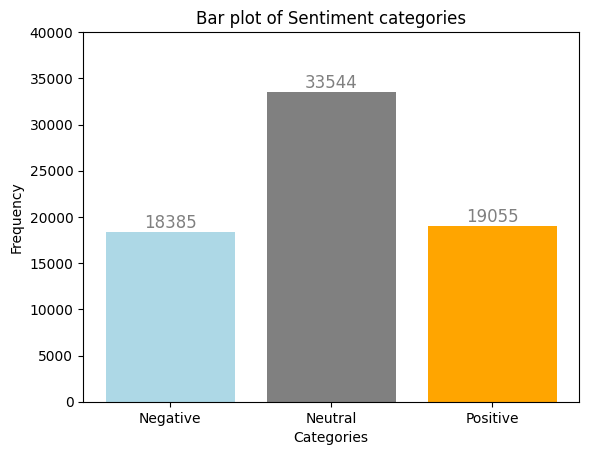

In [26]:
#@markdown [1] 감정분석 결과 막대그래프 (부정, 중립, 긍정)

print('* Negative Flag: ', dfsentiment2['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment2['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment2['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment2['PosFlag'].sum()+dfsentiment2['NeuFlag'].sum()+dfsentiment2['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 40000) 
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


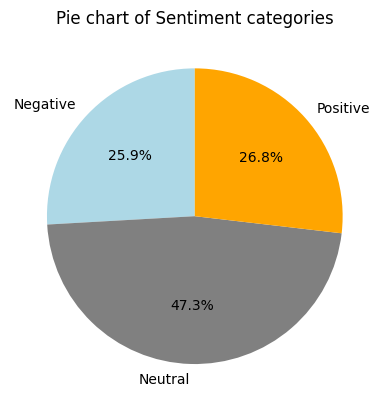

In [27]:
#@markdown [2] 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()


###시계열 분석 시각화

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-4471c9184b78>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby('Book').mean()['CompScore']
<ipython-input-28-4471c9184b78>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby(['Chapter','BookTitle']).m

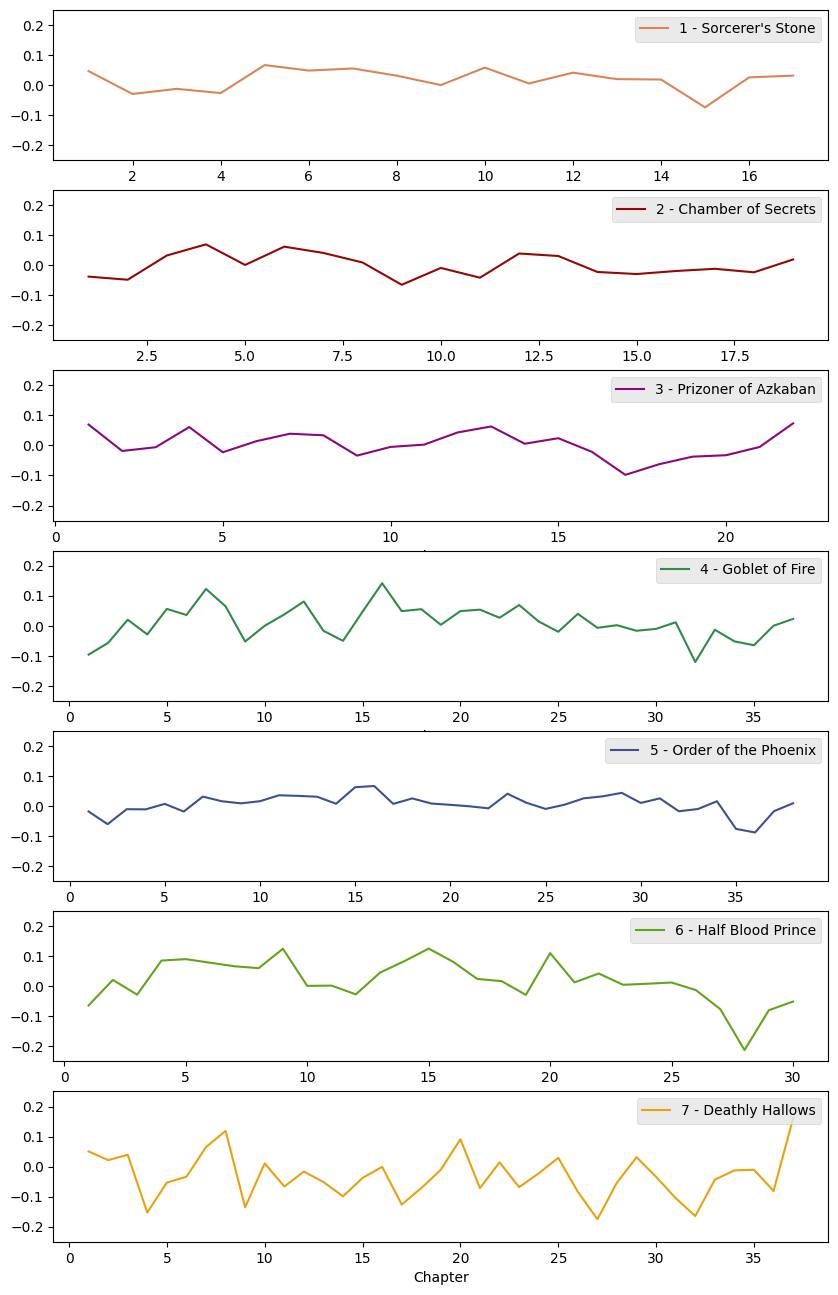

In [28]:
#@markdown 7권 개별적으로 감정변화 흐름 확인
#Time series of sentiments in 7 books of Harry Potter

dfsentiment2.groupby('Book').mean()['CompScore']

def Titles(x):
    if x == 1:
        return "1 - Sorcerer's Stone"
    if x == 2:
        return "2 - Chamber of Secrets"
    if x == 3:
        return "3 - Prizoner of Azkaban"
    if x == 4:
        return "4 - Goblet of Fire"
    if x == 5:
        return "5 - Order of the Phoenix"
    if x == 6:
        return "6 - Half Blood Prince"
    if x == 7:
        return "7 - Deathly Hallows"

dfsentiment2['BookTitle']=dfsentiment2.Book.apply(lambda x: Titles(x))

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

colorsList = ['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# plot data
fig, ax = plt.subplots(figsize=(10,16))
# use unstack()
dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subplots=True, ylim=(-0.25, 0.25), colormap=ColorMap)
plt.style.use('ggplot')
ax.set_ylabel('Compound Sentiment Score')

[ax.legend(loc=1) for ax in plt.gcf().axes]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-dd65d6f4e1ce>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby('Book').mean()['CompScore']
<ipython-input-29-dd65d6f4e1ce>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby(['Chapter','BookTitle']).m

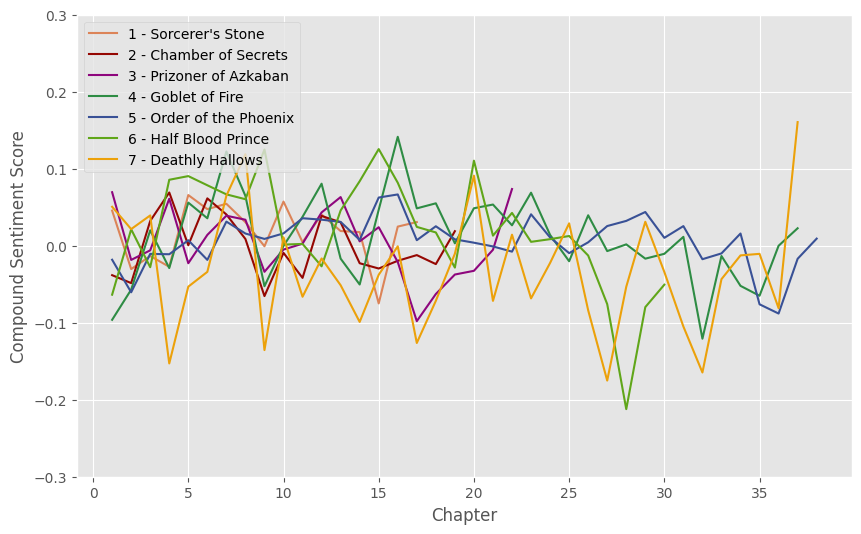

In [29]:
#@markdown 7권을 통합하여 감정변화 흐름 확인
#Time series of sentiments in 7 books of Harry Potter

dfsentiment2.groupby('Book').mean()['CompScore']

def Titles(x):
    if x == 1:
        return "1 - Sorcerer's Stone"
    if x == 2:
        return "2 - Chamber of Secrets"
    if x == 3:
        return "3 - Prizoner of Azkaban"
    if x == 4:
        return "4 - Goblet of Fire"
    if x == 5:
        return "5 - Order of the Phoenix"
    if x == 6:
        return "6 - Half Blood Prince"
    if x == 7:
        return "7 - Deathly Hallows"

dfsentiment2['BookTitle']=dfsentiment2.Book.apply(lambda x: Titles(x))

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

colorsList = ['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# plot data
fig, ax = plt.subplots(figsize=(10,6))
# use unstack()
dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subplots=False, ylim=(-0.3, 0.3), colormap=ColorMap)
plt.style.use('ggplot')
ax.set_ylabel('Compound Sentiment Score')

[ax.legend(loc=2) for ax in plt.gcf().axes]

**ChatGPT says:** In Harry Potter and the Deathly Hallows, the main tragic event between chapters 25 and 28 is the aftermath of Dobby's death. Dobby, the house-elf, dies a hero while saving Harry and his friends from the Death Eaters at Malfoy Manor.


+ The main tragic event that occurs between chapters 25 and 28 in Harry Potter and the Deathly Hallows (Book 7) is the death of Dobby, the house-elf. This event takes place in Chapter 23, "Malfoy Manor", and is not directly within the range you mentioned (chapters 25-28). However, its consequences and emotional impact on the characters continue to resonate in the following chapters.

+ Dobby dies while helping Harry, Hermione, Ron, Luna, Dean, and Griphook escape from Malfoy Manor, where they were captured and held prisoner by Bellatrix Lestrange and other Death Eaters. In an attempt to rescue them, Dobby Apparates into the Manor, and in the ensuing chaos, he is fatally struck by a knife thrown by Bellatrix Lestrange as they Disapparate away.

+ Dobby's death is a significant and heartbreaking moment in the story, as he dies a hero, saving Harry and his friends from the Death Eaters. It underscores the themes of loyalty, sacrifice, and the importance of valuing all beings, regardless of their background or status.

**ChatGPT says:**

**Ending story:** The ending of Harry Potter and the Deathly Hallows (Book 7) sees the final defeat of Lord Voldemort by Harry Potter during the Battle of Hogwarts. The ending is generally considered happy, as it brings the closure of the long-standing conflict between Harry and Voldemort, and most of the central characters, including Harry, Ron, and Hermione, survive and go on to live fulfilling lives. The book concludes with an epilogue set 19 years later, where Harry, Ron, Hermione, and their families are shown sending their own children off to Hogwarts School of Witchcraft and Wizardry, signifying a hopeful and peaceful future.

#[3] Cluster analysis w/ movie reviews

In [30]:
#@markdown CA intro
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.20.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.21.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.22.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#@markdown Import/Install relevant packages
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3
import requests

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 6.7 MB/s eta 0:00:00


## 영화 리뷰 자료 준비하기 (온라인 자료 불러옴)

+ [titles](https://raw.githubusercontent.com/brandomr/document_cluster/master/title_list.txt)
+ [genres](https://raw.githubusercontent.com/brandomr/document_cluster/master/genres_list.txt)
+ [synopses(wiki)](https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_wiki.txt)
+ [synopses(imdb)](https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_imdb.txt)

In [32]:
#@markdown 1단계 처리: 사이트에서 상위 100개의 자료를 각각 가져오기
url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/title_list.txt"
titles = requests.get(url).text.split('\n')
titles = titles[:100]

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/genres_list.txt"
genres = requests.get(url).text.split('\n')
genres = genres[:100]

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_wiki.txt"
synopses_wiki = requests.get(url).text.split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]
# cleaning
synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_imdb.txt"
synopses_imdb = requests.get(url).text.split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]
# cleaning
synopses_clean_imdb = []
for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)
synopses_imdb = synopses_clean_imdb

#@markdown 2단계처리: wiki와 imdb의 synopsis 합치기
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)
synopses[0]

#@markdown 3단계 처리: 영화순위 저장
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []
for i in range(0,len(titles)):
    ranks.append(i)


#@markdown 4단계 처리: 영화제목, 줄거리, 장르, 순위가 몇 개씩 들어왔는지 확인
print("="*50)
print("자료요약")
print("="*50)
print(str(len(titles)) + ' titles')
print(str(len(synopses)) + ' synopses')
print(str(len(genres)) + ' genres')
print(str(len(ranks)) + ' ranks')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


자료요약
100 titles
100 synopses
100 genres
100 ranks


##data cleaning

In [33]:
#@markdown 1단계: NLTK에서 stopwords와 stemmer 가져오기
# load nltk's English stopwords as variable called 'stopwords'
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

#@markdown 2단계: tokenize with stemming위한 함수 만들기
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#@markdown Stemming한 함수적용하여 단어리스트 생성 및 확인
nltk.download('punkt')
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,words
plot,plot
edit,edit
edit,edit
edit,edit
on,on
...,...
join,join
in,in
which,which
he,he


## K-means clustering

In [35]:
#@markdown ▶️ TF-IDF이용 벡터로 변환; 빈도가 너무 많거나 적은 것은 배제
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

#@markdown ▶️ TF-IDF에 이용된 단어리스트 확인 (312302단어 > 563단어)
terms = tfidf_vectorizer.get_feature_names_out()
print(terms)
print(tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'he

["'d" "'s death" "'s father" "'s friend" "'s hous" "'s mother" 'abandon'
 'abl' 'accept' 'accid' 'accompani' 'accus' 'act' 'action' 'actual'
 'admit' 'afterward' 'ago' 'agre' 'air' 'aliv' 'allow' 'alon' 'alreadi'
 'alway' 'american' 'angri' 'angrili' 'ani' 'announc' 'anoth' 'answer'
 'anyon' 'anyth' 'apart' 'appar' 'appear' 'approach' 'area' 'argu' 'arm'
 'armi' 'arrang' 'arrest' 'arriv' 'ask' 'assign' 'assist' 'assum' 'attack'
 'attempt' 'attend' 'attent' 'attract' 'audienc' 'avoid' 'away' 'bad'
 'bar' 'bare' 'battl' 'beat' 'becaus' 'becom' 'bed' 'beg' 'believ' 'best'
 'better' 'big' 'black' 'blow' 'board' 'bodi' 'book' 'boss' 'boy' 'break'
 'brief' 'bring' 'broken' 'brother' 'build' 'burn' 'busi' 'buy' 'ca'
 "ca n't" 'camp' 'captain' 'captur' 'car' 'care' 'career' 'carri' 'case'
 'catch' 'caus' 'chanc' 'chang' 'charg' 'chase' 'child' 'children' 'citi'
 'claim' 'clear' 'climb' 'close' 'cloth' 'club' 'cold' 'collaps' 'come'
 'command' 'commit' 'compani' 'complet' 'concern' 'condit' 'co

In [36]:
#@markdown ▶️ 코사인 유사도를 이용한 거리 계산 (100개의 무비리뷰가 563차원에서 각각 한 점으로 표현가능; 점들 간의 거리계산)
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

print("자료 결과 크기:", dist.shape)
print("="*50)
dist

자료 결과 크기: (100, 100)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.00000000e+00,  8.00539634e-01,  7.62813109e-01, ...,
         6.41312416e-01,  6.70578229e-01,  8.23926244e-01],
       [ 8.00539634e-01, -2.22044605e-16,  7.33477850e-01, ...,
         7.33117814e-01,  7.71609239e-01,  8.92974798e-01],
       [ 7.62813109e-01,  7.33477850e-01,  0.00000000e+00, ...,
         7.23806699e-01,  7.49489708e-01,  8.58673233e-01],
       ...,
       [ 6.41312416e-01,  7.33117814e-01,  7.23806699e-01, ...,
         0.00000000e+00,  4.50879024e-01,  9.17464687e-01],
       [ 6.70578229e-01,  7.71609239e-01,  7.49489708e-01, ...,
         4.50879024e-01,  2.22044605e-16,  8.68599864e-01],
       [ 8.23926244e-01,  8.92974798e-01,  8.58673233e-01, ...,
         9.17464687e-01,  8.68599864e-01, -2.22044605e-16]])

In [37]:
#@markdown 군집을 5개로 정하여 군집분석
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
# clusters

import pandas as pd
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])


print("="*50)
print("1. 군집별별로 묶인 영화수")
print("="*50)
print(frame['cluster'].value_counts())
print("="*50)
print("2. 군집별 순위(Rank) 평균")
print("="*50)
grouped = frame['rank'].groupby(frame['cluster'])
print(grouped.mean())

print("="*50)
print("3. 분류 결과 보기")
print("="*50)
frame


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fe831859120>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/thread

1. 군집별별로 묶인 영화수
2    50
0    22
3    16
4     6
1     6
Name: cluster, dtype: int64
2. 군집별 순위(Rank) 평균
cluster
0    42.500000
1    73.166667
2    50.620000
3    45.500000
4    52.833333
Name: rank, dtype: float64
3. 분류 결과 보기


,rank,title,cluster,genre
0,0,The Godfather,0,"[u' Crime', u' Drama']"
2,1,The Shawshank Redemption,2,"[u' Crime', u' Drama']"
0,2,Schindler's List,0,"[u' Biography', u' Drama', u' History']"
0,3,Raging Bull,0,"[u' Biography', u' Drama', u' Sport']"
0,4,Casablanca,0,"[u' Drama', u' Romance', u' War']"
...,...,...,...,...
2,95,Rebel Without a Cause,2,[u' Drama']
2,96,Rear Window,2,"[u' Mystery', u' Thriller']"
2,97,The Third Man,2,"[u' Film-Noir', u' Mystery', u' Thriller']"
2,98,North by Northwest,2,"[u' Mystery', u' Thriller']"


In [38]:
#@markdown 각 군집별 주요단어와 영화목록 확인
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top terms per cluster:

Cluster 0 words: b'family', b'war', b'army', b'camps', b'killed', b'new',

Cluster 0 titles: The Godfather, Schindler's List, Raging Bull, Casablanca, Gone with the Wind, The Godfather: Part II, Star Wars, Raiders of the Lost Ark, A Streetcar Named Desire, The Best Years of Our Lives, Ben-Hur, Doctor Zhivago, The Good, the Bad and the Ugly, The Treasure of the Sierra Madre, Dances with Wolves, The Pianist, Goodfellas, The Deer Hunter, Giant, The Grapes of Wrath, Network, Yankee Doodle Dandy,

Cluster 1 words: b'relationship', b'love', b'children', b'marriage', b'become', b'town',

Cluster 1 titles: High Noon, Annie Hall, Out of Africa, Good Will Hunting, Terms of Endearment, Wuthering Heights,

Cluster 2 words: b'car', b'police', b'killed', b'father', b"n't", b'home',

Cluster 2 titles: The Shawshank Redemption, One Flew Over the Cuckoo's Nest, Citizen Kane, The Wizard of Oz, Titanic, Psycho, Sunset Blvd., Vertigo, On the Waterfront, Forrest Gump, West Side Stor

In [39]:
#@markdown 군집별 키워드를 이용하여, 군집별 이미지를 AI로 그림 (Midjourney 이용)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.15.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.16.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.17.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.18.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.19.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 6)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Multidimensional scaling (시각화를 위한 차원 축소 563 -> 2)

In [40]:
#@markdown 관련 package불러온 후 MDS실행
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [41]:
#@markdown 군집의 색깔과 이름 지정
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


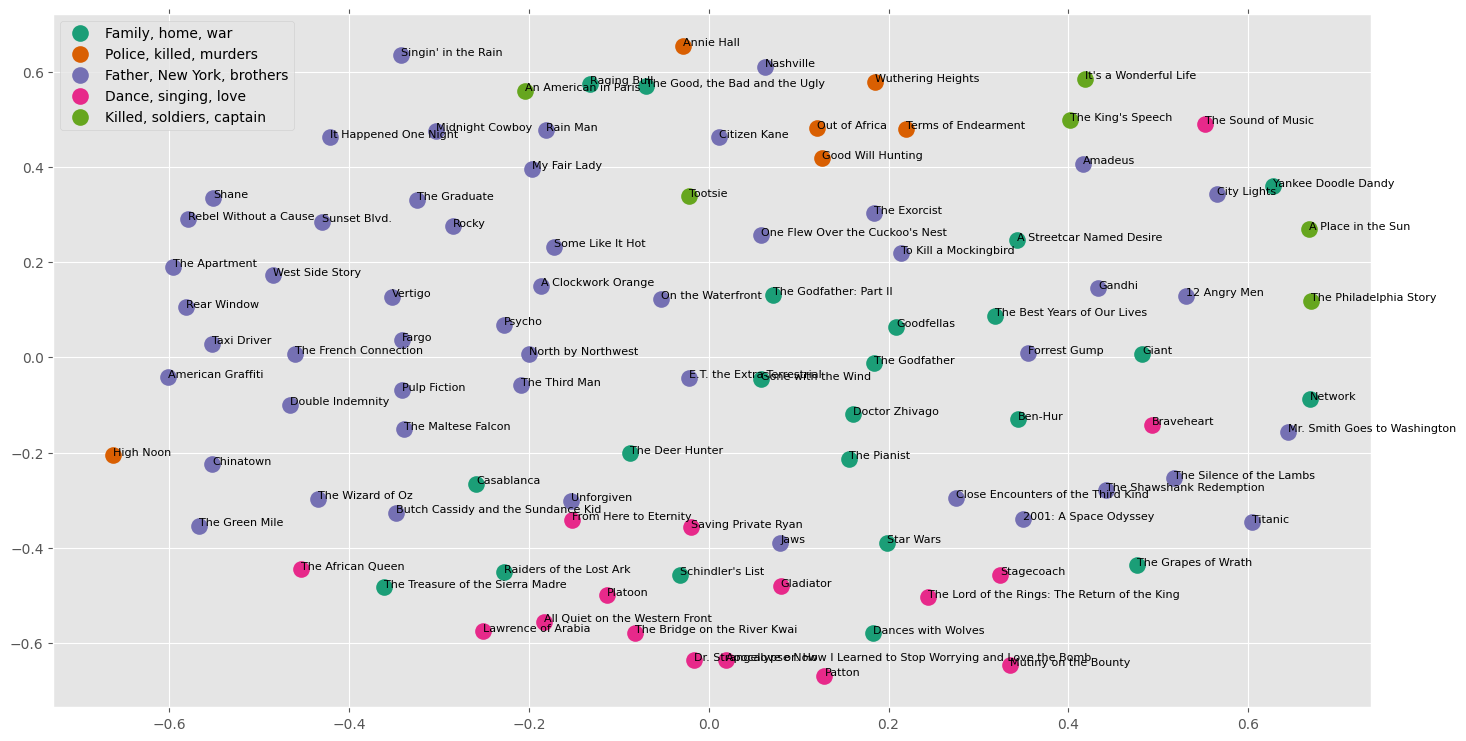

In [42]:
#@markdown MDS시각화
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)
    
plt.show() #show the plot

##Hierarchical document clustering(dendrogram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


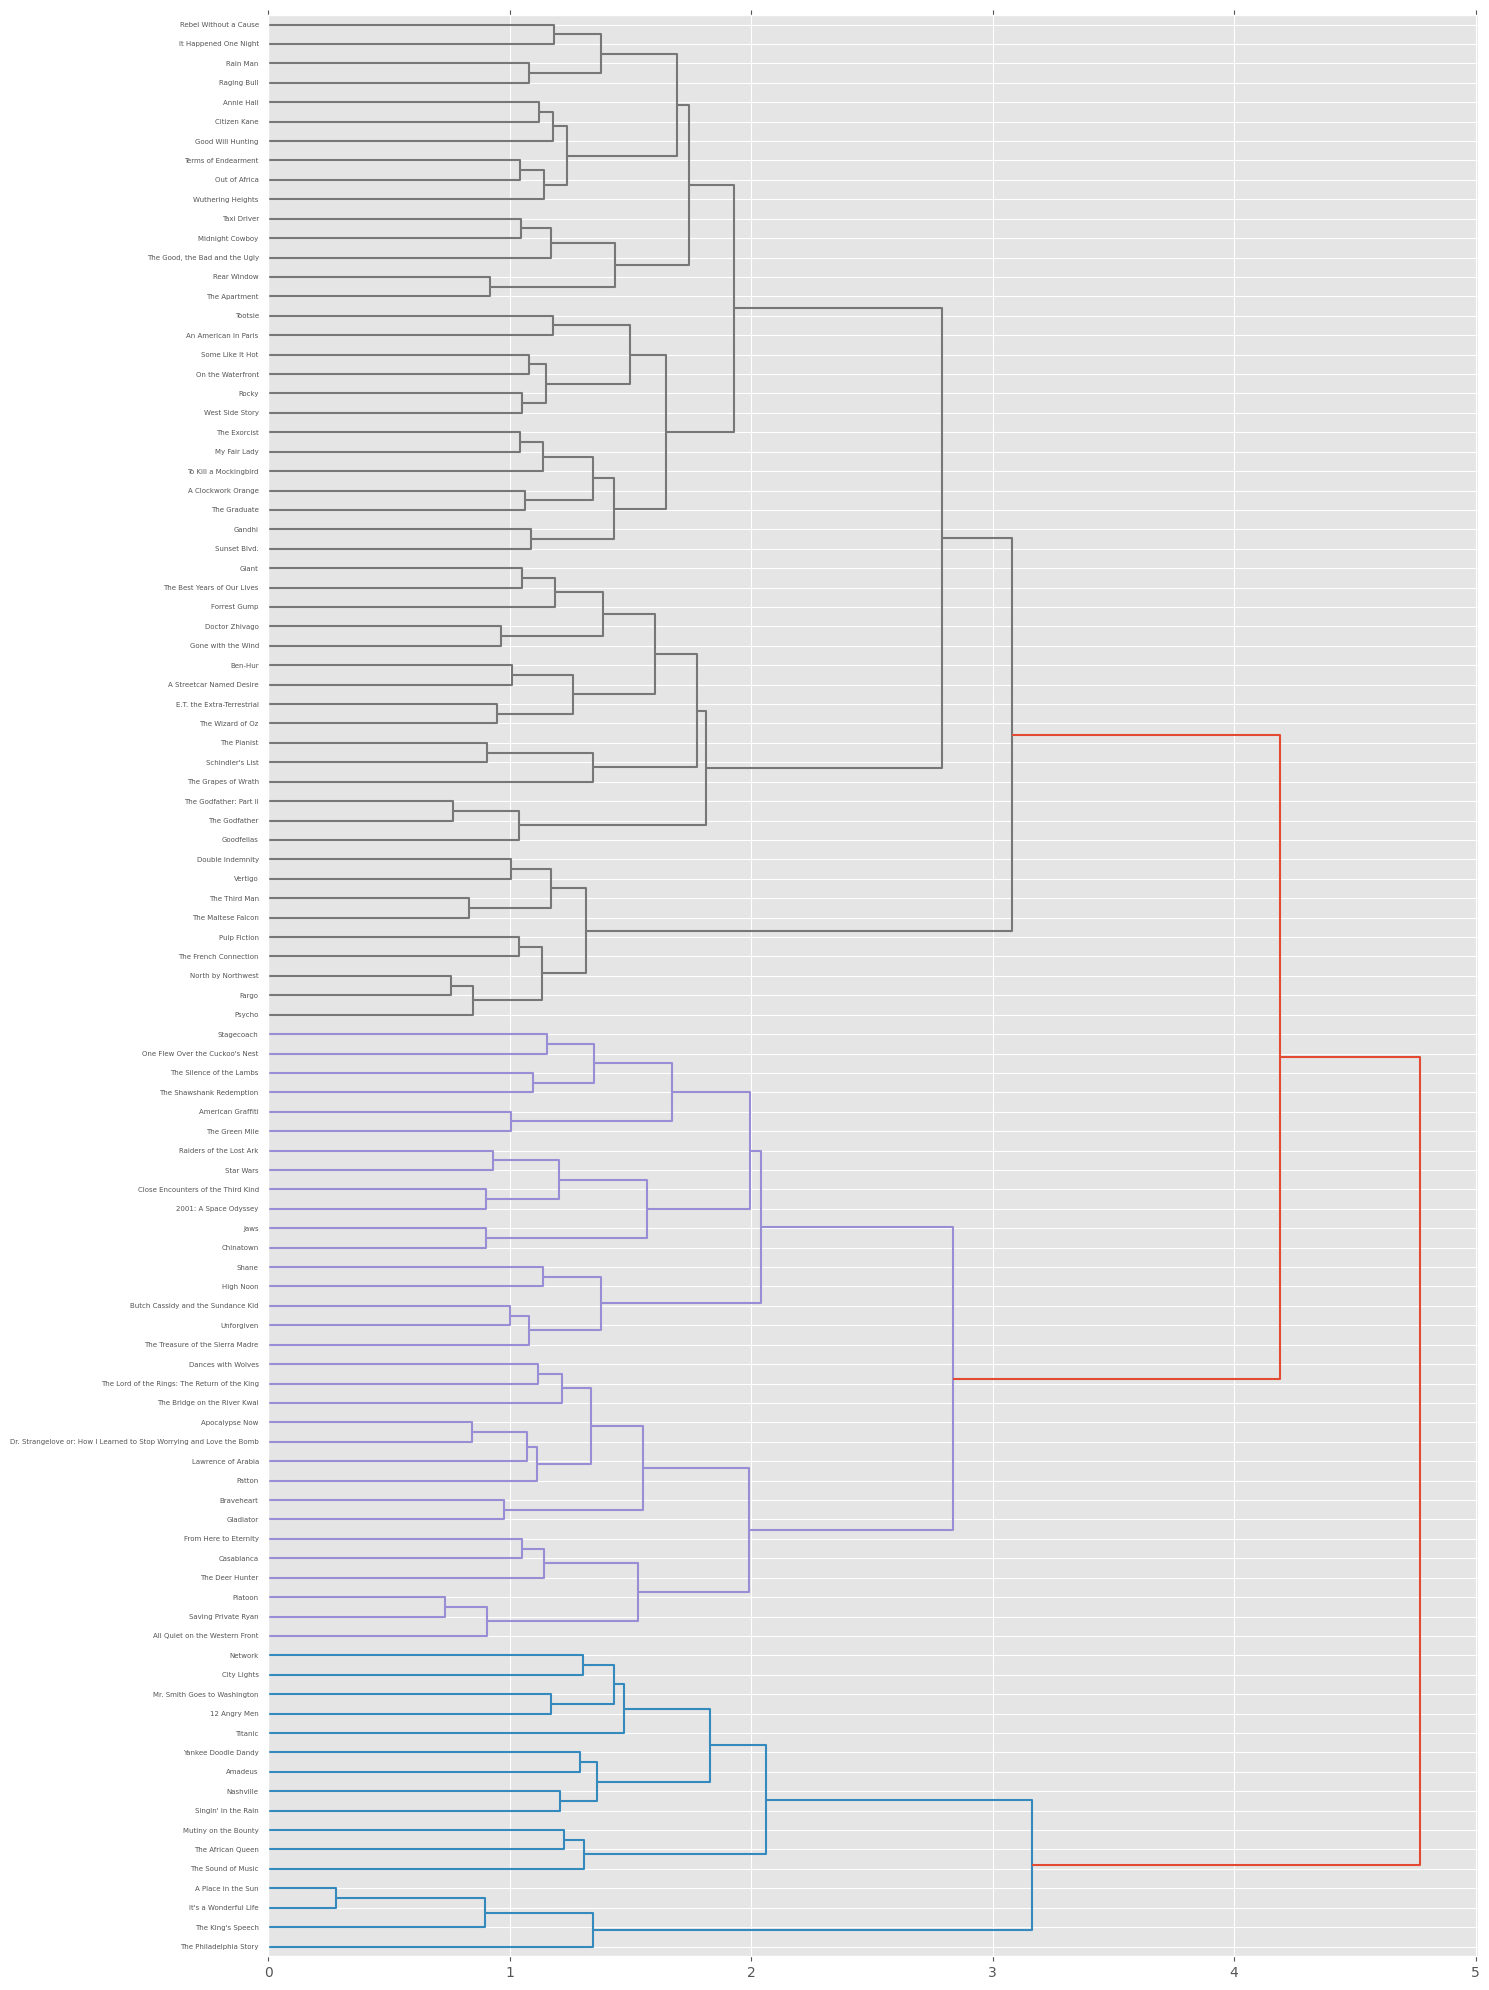

In [43]:
#@markdown Dendrogram을 이용한 시각화
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tight_layout() #show plot with tight layout

In [44]:
#@markdown 감사합니다 😊
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.23.PNG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 2)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
